__Centroid Tracking Notebook:__

We are able to find the centroids and percent overlap of cells, now we need to connect this data for a single cell across multiple images

_Single Cell Tracking:_

Before starting make sure to import all required packages

In [29]:
import skimage 
import cv2 as cv
from skimage import data, io, filters, measure
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize
from PIL import Image
import PIL
import numpy as np
from PIL import ImageSequence
from overlap import getOverlap
import math 




First step is to run out getOverlap function on our stack to get a list of tuples stores in "overlaps"


We then define a function that will give us the euclidean distance between two cell tuples

In [30]:
overlaps = getOverlap('test_stack.tif','protein.png',False)
def distance(x,y):  
     dist = math.sqrt((x[0][0] - y[0][0])**2 + (x[0][1] - y[0][1])**2)  
     return dist 

In [31]:
#Initialize a list that will eventually hold the overlap data for each cell as it travels through the stack
cells = []
numCells = 0
curr = 1
#Initialize another list that will keep track of all the cells in a given image
using = []
#Add a dummy data point to overlaps so that the loop will actually make it through all the data (the loop misses
#the last item in the list)
overlaps.append((1,2,-1))
for x in overlaps:
    if x[2] == 0:
        #add a new item to cells for every cell in the initial frame and increase numCells by one
        cells.append([x])
        numCells += 1
        continue
    if x[2] == curr:
        #Add all the cells in the current frame to the list using
        using.append(x)
    else:
        #Once we move onto the next frame, we loop through each of the items in cells and find which cell in using
        # it is closest to
        curr += 1
        index = -1
        for i in cells:
            #index keeps track of which cell we are looking at and best/dex keep the index of the cell in using that is
            #closest to the cell in cells
            index += 1
            best = 999999
            dex = 0
            count = 0
            for c in using:
                #calculate distance between each cell in using and the last location of the cell i
                dist = distance(c,i[len(i)-1])
                if dist < best:
                    best = dist
                    dex = count
                count += 1
            #append the closest cell to i (the current path of the cell which is stored in cells)
            i.append(using[dex])
            #remove said closest cell from using so it does not get paired to another cell in cells
            using.pop(dex)
        if len(using)!=0:
            #if using is not length 0 after pairing everyone off, that means a new cell has appeared and we need to append
            #it to our list of cells
            for c in using:
                cells.append([c])
        #all this processing was done after we switched frames, so we need to add x, the first cell of this new frame, to using 
        using.append(x)

In [33]:
#Present data in a readable manner by outputting a list of centroid locations as the cell travels through the frame
# and a final fraction of time spent on the protein throughout the cells life
count = 0
for x in cells:
    print("Cell " + str(count)+ ":\n")
    sub = 0
    total = 0
    #Count up the number of frames in which more than 50% of the cell was on the protein
    for i in x:
        sub += 1
        if i[1] >= .5:
            total += 1
        print("T" + str(sub) + ": " + str(i[0]) + "\n")
    #number of frames on protein/total number of frames gives us the fraction of time that we are looking for
    print("Fraction of time spent on protien: " + str(total/sub) + "\n\n")
    count += 1

Cell 0:

T1: (243, 233)

T2: (220, 274)

T3: (309, 285)

T4: (279, 332)

T5: (165, 318)

T6: (119, 319)

T7: (154, 266)

T8: (175, 231)

T9: (175, 182)

T10: (226, 108)

Fraction of time spent on protien: 0.8


Cell 1:

T1: (105, 130)

T2: (134, 57)

T3: (209, 97)

T4: (209, 137)

T5: (248, 178)

T6: (270, 143)

T7: (290, 94)

T8: (243, 156)

T9: (256, 204)

T10: (279, 285)

Fraction of time spent on protien: 0.9




In [34]:
a = distance(((256,204),1),((226,108),1))
print(a)
b = distance(((256,204),1),((279,285),1))
print(b)
c = distance(((175,182),1),((226,108),1))
print(c)
d = distance(((175,182),1),((279,285),1))
print(d)

100.57832768544127
84.20213774008353
89.87213138676528
146.37281168304446


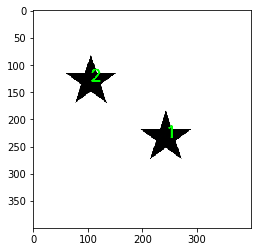

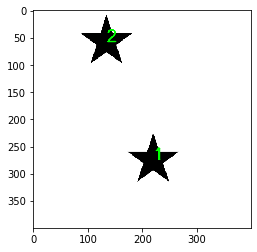

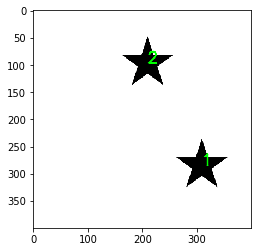

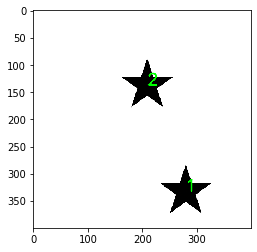

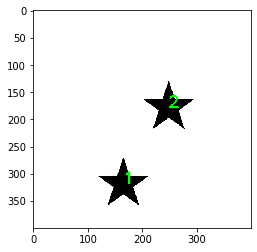

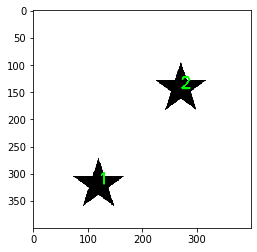

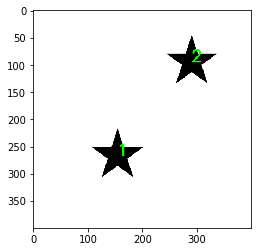

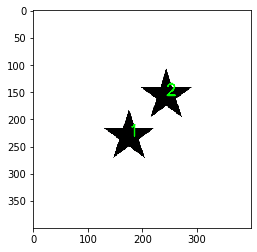

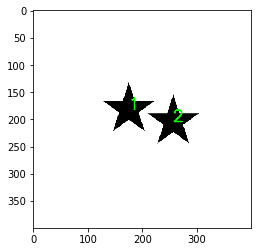

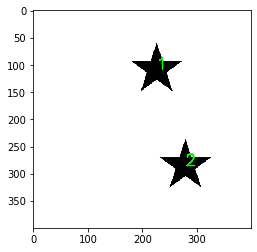

In [26]:
img = Image.open("slides.tif")
overlaps = []
font = cv.FONT_HERSHEY_SIMPLEX 
fontScale = 1
color = (0, 255, 0) 
color2 = (0, 255, 0) 
thickness = 2
for (ii,frame) in enumerate(ImageSequence.Iterator(img)):
    img.seek(ii)
    cell = np.array(img)
    dim = (400,400)
    cell = cv.resize(cell,dim)
    pic = cv.putText(cell, "1", cells[0][ii][0], font, fontScale, color, thickness, cv.LINE_AA)
    pic = cv.putText(cell, "2", cells[1][ii][0], font, fontScale, color2, thickness, cv.LINE_AA)
    string = "/Users/mbronars/Documents/sohn/Sohn/trackStack" + "/im" + str(ii) + ".jpg"
    cv.imwrite(string, pic);
    plt.imshow(pic)
    plt.show()